## Foreign Workers in Japan by Country and Visa Type (as of Oct. 2022)

<a href="https://www.japantimes.co.jp/news/2023/01/27/national/foreign-worker-population-japan/"> Foreign Worker Population in Japan</a> (Jan. 27, 2023) English article
<p>
<a href="https://www.mhlw.go.jp/stf/newpage_30367.html"> Data from Japan's Ministry of Health, Labour and Welfare</a>　厚生労働省のデータ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'https://www.mhlw.go.jp/content/11655000/001044545.xlsx'
df = pd.read_excel(path,sheet_name=1,skiprows=3,skipfooter=8,
                   header=[0,1],index_col=[0,1])
print('Data ready!')

Data ready!


In [3]:
# print the first index column and the first header row to paste them into google translate and get a draft
print(df.index.get_level_values(0))
print(df.columns.get_level_values(0))

Index(['全国籍計', '全国籍計', '中国\n（香港、マカオを含む）', '中国\n（香港、マカオを含む）', '韓国', '韓国',
       'フィリピン', 'フィリピン', 'ベトナム', 'ベトナム', 'ネパール', 'ネパール', 'インドネシア', 'インドネシア',
       'ミャンマー', 'ミャンマー', 'ブラジル', 'ブラジル', 'ペルー', 'ペルー', 'Ｇ７等（注４）', 'Ｇ７等（注４）',
       'Ｇ７等（注４）', 'Ｇ７等（注４）', 'Ｇ７等（注４）', 'Ｇ７等（注４）', 'その他', 'その他'],
      dtype='object')
Index(['全在留\n資格計', '①専門的・技術的分野の在留資格（注２）', '①専門的・技術的分野の在留資格（注２）', '②特定活動\n（注３）',
       '③技能実習', '④資格外活動', '④資格外活動', '⑤身分に基づく在留資格　', '⑤身分に基づく在留資格　',
       '⑤身分に基づく在留資格　', '⑤身分に基づく在留資格　', '⑤身分に基づく在留資格　', '⑥不明'],
      dtype='object')


In [4]:
df.index = ['All', 'All %', 'China', 'China %', 
            'S. Korea', 'S. Korea %','Philippines', 'Philippines %', 'Vietnam', 'Vietnam %', 'Nepal', 'Nepal %', 
            'Indonesia', 'Indonesia %','Myanmar', 'Myanmar %', 'Brazil', 'Brazil %', 'Peru', 'Peru %', 
            'G7', 'G7 %', 'G7: USA', 'G7: USA %', 'G7: UK', 'G7: UK %', 'Others', 'Others %']
df.index.name = 'Country'
df.columns = ['Total', '(1) All Professional Technical','(1) Engineer Humanities International', \
         '(2) Designated activities', '(3) Technical intern training', '(4) All other activities', \
        '(4) Student other activities', '(5) Based on status_total', \
         '(5) Permanent resident', '(5) Spouse of Japanese', '(5) Spouse of permanent resident', \
         '(5) Long-term resident', '(6) Unknown']

Remove rows with percent of each country as a proportion of all foreign workers

In [5]:
df = df.loc[[x for x in df.index if "%" not in x]]
# now everything is integer, so I'm casting it to int
df = df.astype(int)
df.head()

,Total,(1) All Professional Technical,(1) Engineer Humanities International,(2) Designated activities,(3) Technical intern training,(4) All other activities,(4) Student other activities,(5) Based on status_total,(5) Permanent resident,(5) Spouse of Japanese,(5) Spouse of permanent resident,(5) Long-term resident,(6) Unknown
Country,,,,,,,,,,,,,
All,1822725,479949,318850,73363,343254,330910,258636,595207,357434,99639,17126,121008,42
China,385848,133214,103653,5216,40093,77248,62468,130074,95102,17646,6416,10910,3
S. Korea,67335,28852,25267,1617,16,6997,5934,29853,21603,6144,509,1597,0
Philippines,206050,21482,8690,5055,32206,3085,2046,144221,85420,20264,3369,35168,1
Vietnam,462384,119449,69926,33166,183011,108378,91959,18380,8498,4766,1520,3596,0


<AxesSubplot:xlabel='Total', ylabel='Country'>

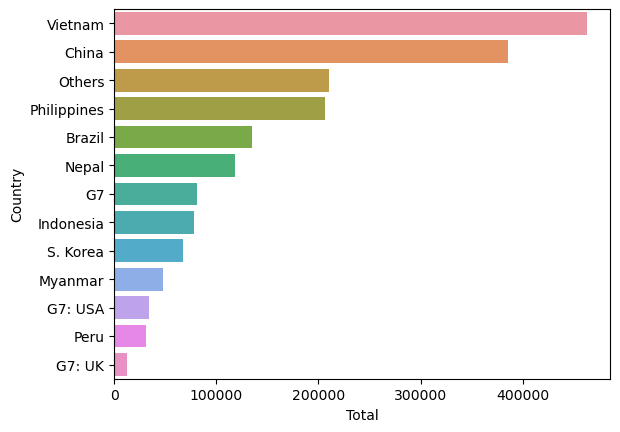

In [6]:
# format for sns: reset the index, sort values by what we want to plot (the total)
tmp = df.reset_index().sort_values('Total', ascending=False)
sns.barplot(data=tmp[1:], y='Country' ,x ='Total', orient='h')

### Breakdown by Country

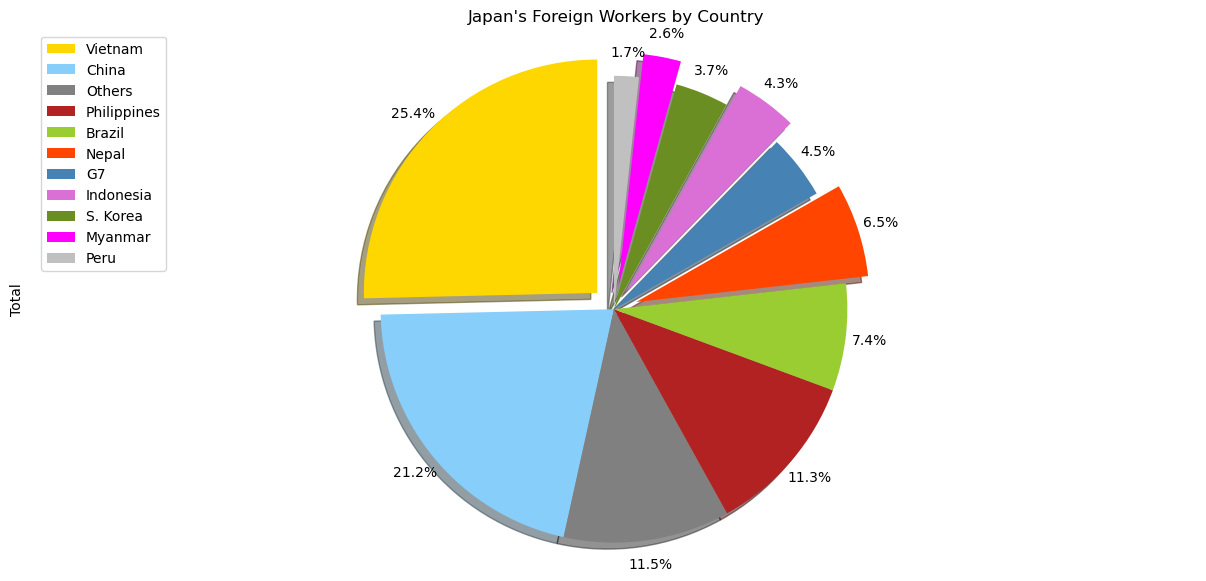

In [25]:
pie = tmp.drop(index=[0,11,12])[['Country','Total']]
pie.set_index('Country', inplace=True)
colors_list = ['gold','lightskyblue','gray','firebrick','yellowgreen','orangered','steelblue','orchid','olivedrab','magenta','silver']
explode_list = [0.1,0,0,0,0,0.1,0,0.1,0,0.1,0] 
pie['Total'].plot(kind='pie',figsize=(15,7),
                  autopct='%1.1f%%',startangle=90,
                  shadow=True,labels=None,pctdistance=1.103,
                  colors=colors_list,explode=explode_list)
plt.title("Japan's Foreign Workers by Country")
plt.axis('equal')
plt.legend(labels=pie.index, loc='upper left')

One thing that stands out is how Vietnam makes up the biggest piece of the pie, with 25.4 percent. When did this happen? Even the dataframe above puts China next to "All" or total. To investigate, I've pulled historical data and compiled them in one file. Let's call this `time_series`. We can see some missing data (NaN) and the "Others" category keeps fluctuating as individual countries are being plucked out of the "Others" category and becoming a separate "highlighted" country.

In [26]:
time_series = pd.read_excel('foreigners_japan.xlsx',sheet_name='Time Series')

In [27]:
time_series = time_series[:-1]
time_series.set_index('Country',inplace=True)
time_series.index.name = None
time_series

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
China,210578.0,249325.0,287105.0,297199.0,296388.0,303886.0,311831.0,322545.0,344658.0,372263.0,389117.0,418327.0,419431.0,397084.0,385848
S. Korea,20661.0,25468.0,28921.0,30619.0,31780.0,34100.0,37262.0,41461.0,48121.0,55926.0,62516.0,69191.0,68897.0,67638.0,67335
Philippines,40544.0,48859.0,61710.0,70301.0,72867.0,80170.0,91519.0,106533.0,127518.0,146798.0,164006.0,179685.0,184750.0,191083.0,206050
Vietnam,NaN,NaN,NaN,NaN,26828.0,37537.0,61168.0,110013.0,172018.0,240259.0,316840.0,401326.0,443998.0,453344.0,462384
Nepal,NaN,NaN,NaN,NaN,NaN,NaN,24282.0,39056.0,52770.0,69111.0,81562.0,91770.0,99628.0,98260.0,118196
Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41586.0,51337.0,53395.0,52810.0,77889
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47498
Brazil,99179.0,104323.0,116363.0,116839.0,101891.0,95505.0,94171.0,96672.0,106597.0,117299.0,127392.0,135455.0,131112.0,134977.0,135167
Peru,15317.0,18548.0,23360.0,25036.0,23267.0,23189.0,23331.0,24422.0,26072.0,27695.0,28686.0,29554.0,29054.0,31381.0,31263
G7,39968.0,43714.0,46221.0,50321.0,51156.0,53584.0,57212.0,61211.0,67355.0,73636.0,77505.0,81003.0,80414.0,78621.0,81175


This is due to immigration trends, such as technical trainees/interns or nurses from Vietnam, Indonesia, Philippines, Nepal, and Myanmar coming in to ease Japan's worsening labor shortage. Myanmar's geopolitical environment at home may have also contributed to their rise in number and Japan giving them a separate category (unlike countries that are lumped into "others").

Text(0.5, 1.0, 'Vietnam Overtakes a Declining China in 2019')

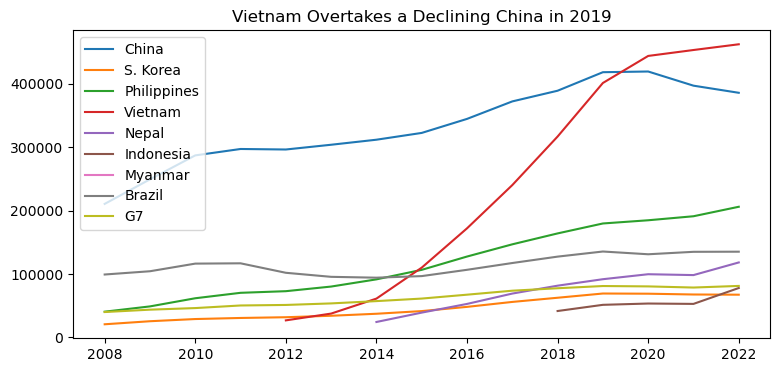

In [32]:
ts = time_series.transpose()
ts.drop(['Peru','Others'], axis=1, inplace=True)
ts.plot(kind='line', figsize=(9,4))
plt.title('Vietnam Overtakes a Declining China in 2019')

### Insights from visa type or status of residence

Although Vietnam has surpassed China in total number, it's mostly thanks to newcomers--students engaging in part-time work, technical intern trainees, etc. Chinese people in Japan, on the other hand, have more "Engineer Humanities International" visas with corporate jobs, or permanent residents (also those who are married to a Japanese national or a fellow non-Japanese national with a long-term visa).

Same goes for the Philippines and Brazil, which you might've guessed, have a long history of living or working in Japan because of their heritage or spouse.

C:\Users\tacaq\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


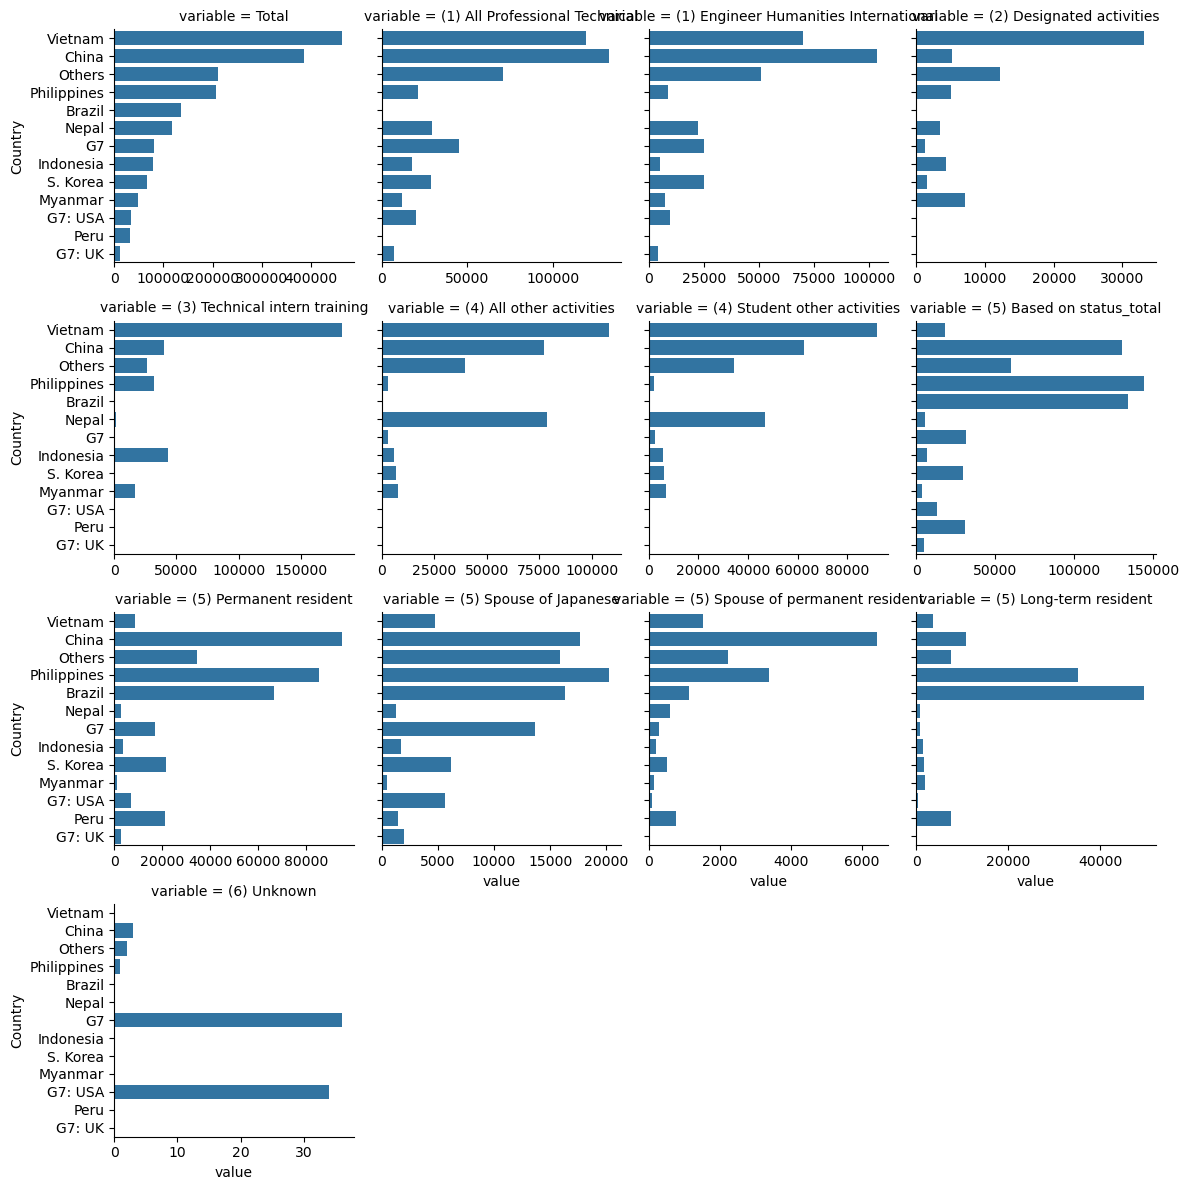

In [34]:
melt_df = df.drop('All', axis=0).sort_values('Total', ascending=False).reset_index().melt(id_vars= 'Country')
g = sns.FacetGrid(melt_df, col='variable' ,sharex=False,col_wrap=4)
g.map(sns.barplot,'value','Country', orientation='horizontal')

# Thank you! ありがとうございました！